# Exploratory Descriptive Analysis of Local Transportation

This is an Exploratory Descriptive Analysis of expenditure with local transportation. We already created three separated notebooks to explore the data of the subquotas 'Taxi, toll and parking', 'Automotive vehicle renting or charter' and 'Fuels and lubricants'. In this notebook, we will join the analysis of this subquotas.

The subquota 'Automotive vehicle renting or charter' changed in the time. It started like 'Automotive vehicle renting or watercraft charter' and in October/2013 was split in 'Watercraft renting or charter' and 'Automotive vehicle renting or charter'. 

The previous notebooks are in:

'Automotive vehicle renting or charter': https://github.com/datasciencebr/serenata-de-amor/pull/206/commits/6afda4344c6565ec01536242353730b14f2ebaee

'Taxi, toll and parking': https://github.com/datasciencebr/serenata-de-amor/blob/master/develop/2017-03-15-fabiocorreacordeiro-taxi-descriptive-analysis.ipynb

'Fuels and lubricants': https://github.com/datasciencebr/serenata-de-amor/pull/203/commits/2635528e4faa9d94562e08972164ddba2173b15d

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [90]:
data = pd.read_csv('../data/2017-03-14-reimbursements.xz',
                   parse_dates=[16],
                   low_memory=False,
                   dtype={'document_id': np.str,
                          'congressperson_id': np.str,
                          'congressperson_document': np.str,
                          'term_id': np.str,
                          'cnpj_cpf': np.str,
                          'reimbursement_number': np.str,})

First step is subset the data of local transportation of all reimbursements

In [91]:
taxi = data[(data['subquota_description'] == 'Taxi, toll and parking')]
fuel = data[(data['subquota_description'] == 'Fuels and lubricants')]
rent_car_and_boat = data[(data['subquota_description'] =='Automotive vehicle renting or watercraft charter')]
rent_car = data[(data['subquota_description'] == 'Automotive vehicle renting or charter')]
rent_boat = data[(data['subquota_description'] =='Watercraft renting or charter')]

In [92]:
transportation = pd.DataFrame()
transportation = transportation.append(taxi)
transportation = transportation.append(fuel)
transportation = transportation.append(rent_car_and_boat)
transportation = transportation.append(rent_car)
transportation = transportation.append(rent_boat)

Then, we will analyse total expenses by month.

In [93]:
transportation_month = transportation.groupby(['year',
                                               'month']).agg({'total_net_value':sum})

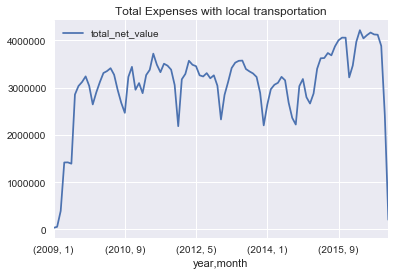

In [94]:
transportation_month.plot()
plt.title('Total Expenses with local transportation')

Here we can observe that the total expenses didn't change so much. There was an increase in 2015/16 when the limit of 'Fuels and lubricants' raised to R$6,000.

Now we will analyze the total expenses by month for each subquota. It necessary to pay attention when each subquota started, 'Taxi, toll and parking' started in October/2013, the same date when 'Automotive vehicle renting or watercraft charter' was split. There are 'Fuels and lubricants' reimbursement since 2009.

In [95]:
taxi_month = taxi.groupby(['year','month']).agg({'total_net_value':sum})
fuel_month = fuel.groupby(['year','month']).agg({'total_net_value':sum})
rent_car_and_boat_month = rent_car_and_boat.groupby(['year','month']).agg({'total_net_value':sum})
rent_car_month = rent_car.groupby(['year','month']).agg({'total_net_value':sum})
rent_boat_month = rent_boat.groupby(['year','month']).agg({'total_net_value':sum})

(0, 2500000)

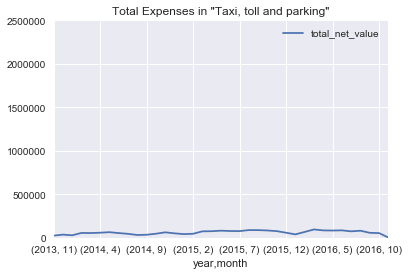

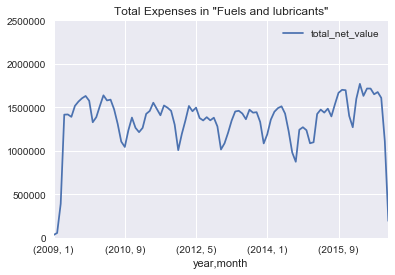

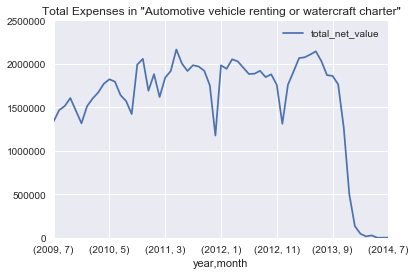

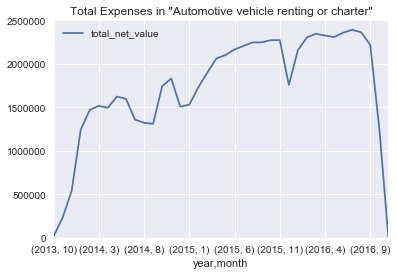

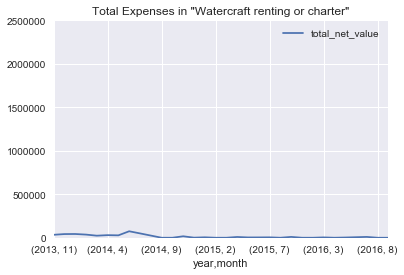

In [96]:
taxi_month.plot()
plt.title('Total Expenses in "Taxi, toll and parking"')
plt.ylim([0, 2500000])

fuel_month.plot()
plt.title('Total Expenses in "Fuels and lubricants"')
plt.ylim([0, 2500000])

rent_car_and_boat_month.plot()
plt.title('Total Expenses in "Automotive vehicle renting or watercraft charter"')
plt.ylim([0, 2500000])

rent_car_month.plot()
plt.title('Total Expenses in "Automotive vehicle renting or charter"')
plt.ylim([0, 2500000])

rent_boat_month.plot()
plt.title('Total Expenses in "Watercraft renting or charter"')
plt.ylim([0, 2500000])

Now we will check the mean of all expenses per congressman.

In [97]:
transportation_mean = transportation.groupby(['year',
                                              'month',
                                              'congressperson_id']).agg({'total_net_value':sum})
transportation_mean = transportation_mean.reset_index()
transportation_mean = transportation_mean.groupby(['year',
                                                   'month']).agg({'total_net_value':'mean'})

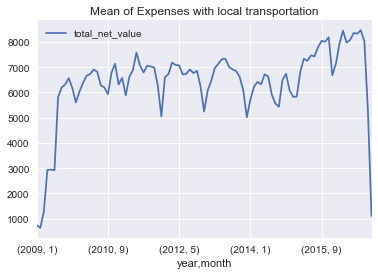

In [98]:
transportation_mean.plot()
plt.title('Mean of Expenses with local transportation')

And mean per subquota.

In [99]:
#'Taxi, toll and parking'
taxi_mean = taxi.groupby(['year',
                          'month',
                          'congressperson_id']).agg({'total_net_value':sum})
taxi_mean = taxi_mean.reset_index()
taxi_mean = taxi_mean.groupby(['year',
                               'month']).agg({'total_net_value':'mean'})

#'Fuels and lubricants'
fuel_mean = fuel.groupby(['year',
                          'month',
                          'congressperson_id']).agg({'total_net_value':sum})
fuel_mean = fuel_mean.reset_index()
fuel_mean = fuel_mean.groupby(['year',
                               'month']).agg({'total_net_value':'mean'})

#'Automotive vehicle renting or watercraft charter'
rent_car_and_boat_mean = rent_car_and_boat.groupby(['year',
                                                    'month',
                                                    'congressperson_id']).agg({'total_net_value':sum})
rent_car_and_boat_mean = rent_car_and_boat_mean.reset_index()
rent_car_and_boat_mean = rent_car_and_boat_mean.groupby(['year',
                                                         'month']).agg({'total_net_value':'mean'})

#'Automotive vehicle renting or charter'
rent_car_mean = rent_car.groupby(['year',
                                  'month',
                                  'congressperson_id']).agg({'total_net_value':sum})
rent_car_mean = rent_car_mean.reset_index()
rent_car_mean = rent_car_mean.groupby(['year',
                                       'month']).agg({'total_net_value':'mean'})

#'Watercraft renting or charter'
rent_boat_mean = rent_boat.groupby(['year',

                                    'month',
                                    'congressperson_id']).agg({'total_net_value':sum})
rent_boat_mean = rent_boat_mean.reset_index()
rent_boat_mean = rent_boat_mean.groupby(['year',
                                         'month']).agg({'total_net_value':'mean'})

(0, 27000)

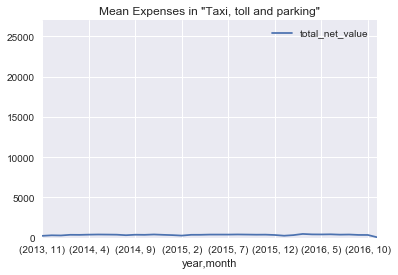

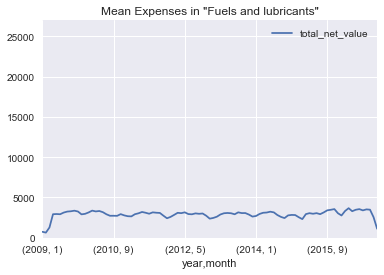

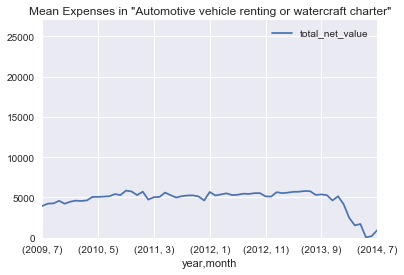

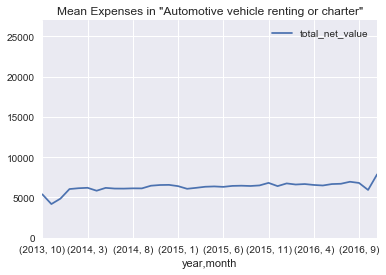

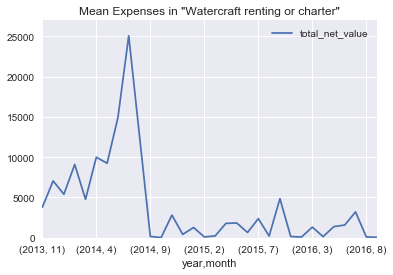

In [100]:
taxi_mean.plot()
plt.title('Mean Expenses in "Taxi, toll and parking"')
plt.ylim([0, 27000])

fuel_mean.plot()
plt.title('Mean Expenses in "Fuels and lubricants"')
plt.ylim([0, 27000])

rent_car_and_boat_mean.plot()
plt.title('Mean Expenses in "Automotive vehicle renting or watercraft charter"')
plt.ylim([0, 27000])

rent_car_mean.plot()
plt.title('Mean Expenses in "Automotive vehicle renting or charter"')
plt.ylim([0, 27000])

rent_boat_mean.plot()
plt.title('Mean Expenses in "Watercraft renting or charter"')
plt.ylim([0, 27000])

The "Taxi, toll and parking" expenses were much lower than the other subquotas, for now, we will not analyze it.

# "Fuels and lubricants"

When we read the legislation about CEAP (http://www2.camara.leg.br/legin/int/atomes/2009/atodamesa-43-21-maio-2009-588364-normaatualizada-cd-mesa.pdf) the Art 2°, § 1° said:

*"§ 1º As despesas estabelecidas nos incisos I, VII e VIII poderão ser realizadas por assessores, assim entendidos os servidores efetivos, os ocupantes de cargos de natureza especial ou secretários parlamentares vinculados à Câmara dos Deputados.*

*§ 1º The expenses established in items I, VII and VIII may be performed by advisors, understood as the effective servants, occupants of special positions or parliamentary secretaries attached to the Chamber of Deputies."*

So, we understanding that expenses with "Fuel and Lubricants" (item IX) can't be used by advisors, only by the congressman.

Now we will try to find some reimbursements suspects in subquota "Fuel and lubricants". We will use the worst case acceptable to find a limit to expenses, any reimbursement greater than this limit we will consider a suspect reimbursement.

### We will consider suspecting all reimbursements that exceed the max cost of R$948,90.

The max cost was calculate using the worst case that is possible to fill a gas and lubricant tank of a car. We used the biggest gas tank in Brazilian market (Ford F-250 with 110l tank),
the cost of gas in the most expense gas station in Brazil (R4,70) and 10l of most expensive lubricant (R$40). Most of the service stations don't charge to change lubricants.

Fonts: 

Tanks size: https://panelinhanet.wordpress.com/2013/02/20/combustivel-quantos-litros-cabem-no-tanque-do-seu-veiculo/ in 18/mar/2017 

Cost of gas: http://www.anp.gov.br/preco/prc/Resumo_Semanal_Combustiveis.asp in 25/apr/2017 

Lubricant capacity: http://www.autoideia.com.br/capacidade_oleo_motor_automoveis&codmar=ford 

Cost of lubricant: http://www.mercadomineiro.com.br/pesquisa/oleo-lubrificante-pesquisa-precos

In [101]:
fuel_cost = 4.70
fuel_capacity = 110
lubricant_cost = 40
lubricant_capacity = 10
max_cost = fuel_cost*fuel_capacity + lubricant_cost*lubricant_capacity
max_cost

917.0

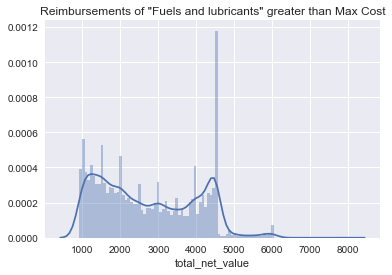

In [102]:
fuel_outliers = fuel[fuel['total_net_value'] > max_cost].sort_values('total_net_value', ascending=False)
sns.distplot(fuel_outliers['total_net_value'],bins=100)
plt.title('Reimbursements of "Fuels and lubricants" greater than Max Cost')

In [103]:
fuel_outliers['total_net_value'].sum()

67530165.219999999

In [104]:
fuel_outliers['total_net_value'].describe()

count    24863.000000
mean      2716.090786
std       1267.660271
min        917.040000
25%       1549.200000
50%       2500.000000
75%       3926.070000
max       7937.630000
Name: total_net_value, dtype: float64

If we want to be benevolent with the congresspeople we would admit that these reimbursements were the payment of full month, and they agree with the gas station to pay all in only one payment. So let's calculate the max cost of a month.

Using the same logic of worst case, we will consider that the congresspeople drove the same distance that a taxi driver in São Paulo. In São Paulo there is 3.491 taxi drivers work for a taxi company and they drive 20.000.000 km per month. It's about 5,729km per month for each driver.

Consumption of gas of Ford F-250 - 6,93 Km/L

Most expensive cost of gas on Brasília - R$3,88/L

### The max cost for a full month is R$3,207.

Fonts:

Statistics of Taxi in SP - http://www.adetax.com.br/index.php/informacoes-e-servicos/estatisticas/

Ford F-250 - http://www.vrum.com.br/fichatecnica/Ford/F_250/2002/003114-3

Cost of gas: http://www.anp.gov.br/preco/prc/Resumo_Semanal_Combustiveis.asp in 25/apr/2017 

In [105]:
fuel_cost = 3.88
distance = 5729
consumption = 6.93
max_cost_month = (distance / consumption) * fuel_cost
max_cost_month

3207.5786435786436

Now we will divide the suspects reimbursements in Red Flag (above monthly max cost) and yellow flag (above a max cost for a single tank but below a monthly cost).

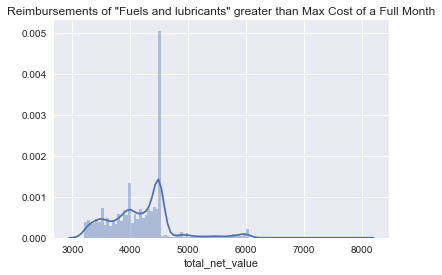

In [106]:
fuel_outliers_redflag = fuel_outliers[fuel_outliers['total_net_value'] >= max_cost_month].sort_values('total_net_value', ascending=False)
fuel_outliers_redflag['suspect'] = "Fuel Red Flag"
sns.distplot(fuel_outliers_redflag['total_net_value'],bins=100)
plt.title('Reimbursements of "Fuels and lubricants" greater than Max Cost of a Full Month')

In [107]:
fuel_outliers_redflag['total_net_value'].sum()

37945515.5

In [108]:
fuel_outliers_redflag['total_net_value'].describe()

count    9094.000000
mean     4172.588025
std       544.467656
min      3207.650000
25%      3800.927500
50%      4200.015000
75%      4500.000000
max      7937.630000
Name: total_net_value, dtype: float64

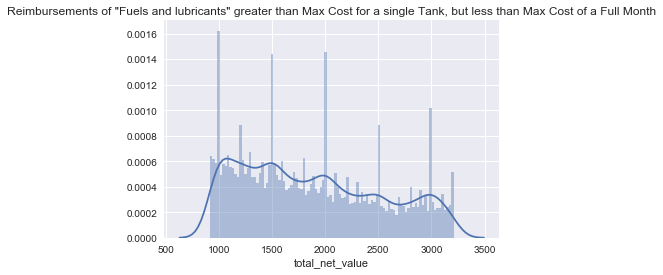

In [109]:
fuel_outliers_yellowflag = fuel_outliers[fuel_outliers['total_net_value'] < max_cost_month].sort_values('total_net_value', ascending=False)
fuel_outliers_yellowflag['suspect'] = "Fuel Yellow Flag"
sns.distplot(fuel_outliers_yellowflag['total_net_value'],bins=100)
plt.title('Reimbursements of "Fuels and lubricants" greater than Max Cost for a single Tank, but less than Max Cost of a Full Month')

In [110]:
fuel_outliers_yellowflag['total_net_value'].sum()

29584649.719999999

In [111]:
fuel_outliers_yellowflag['total_net_value'].describe()

count    15769.000000
mean      1876.127194
std        658.589709
min        917.040000
25%       1300.950000
50%       1787.550000
75%       2400.000000
max       3207.520000
Name: total_net_value, dtype: float64

### We found 9,094 reimbursements (R$37,9 millions - Red Flag) without justification to be so expensive and other 15,769 (R29,5 millions - Yellow Flag) very suspect.

Until now we checked the expenses of single reimbursements, next step is to check if the sum of all reimbursements in a month is greater than the monthly max cost.

In [112]:
fuel_congressperson = fuel.groupby(['congressperson_id',
                                    'year',
                                    'month']).agg({'total_net_value':sum})
fuel_congressperson = fuel_congressperson.reset_index()
fuel_congressperson = fuel_congressperson[fuel_congressperson['total_net_value'] >= max_cost_month].reset_index()
fuel_congressperson['cong_year_month'] = fuel_congressperson['congressperson_id'].map(str)+fuel_congressperson['year'].map(str)+fuel_congressperson['month'].map(str)
cong_year_month = fuel_congressperson['cong_year_month'].unique()

fuel['cong_year_month'] = fuel['congressperson_id'].map(str)+fuel['year'].map(str)+fuel['month'].map(str)
fuel_outlier_monthlycost = fuel[fuel['cong_year_month'].isin(cong_year_month)]

suspects = fuel_outliers['document_id'].unique()

fuel_outlier_monthlycost = fuel_outlier_monthlycost[~fuel_outlier_monthlycost.document_id.isin(suspects)]
del fuel_outlier_monthlycost['cong_year_month']
fuel_outlier_monthlycost['suspect'] = "Fuel monthly"

C:\Users\fabio\Anaconda3\envs\serenata_de_amor\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


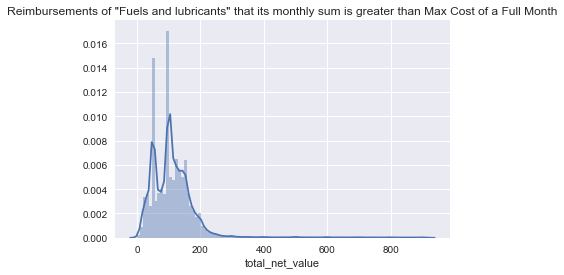

In [113]:
sns.distplot(fuel_outlier_monthlycost['total_net_value'],bins=100)
plt.title('Reimbursements of "Fuels and lubricants" that its monthly sum is greater than Max Cost of a Full Month')

In [114]:
fuel_outlier_monthlycost['total_net_value'].sum()

33631621.369999997

In [115]:
fuel_outlier_monthlycost['total_net_value'].describe()

count    290184.000000
mean        115.897573
std          89.924128
min           0.010000
25%          60.000000
50%         100.000000
75%         142.950000
max         916.870000
Name: total_net_value, dtype: float64

### We found 290,202 reimbursements (R$33,6 millions) that its monthly sum was greater than Max Cost of a Full Month. 

# 'Automotive vehicle renting or charter'

In the case of 'Automotive vehicle renting or charter' the car rented could be used by the congressman or by an advisor.

In this case, we will try to determine a moral limit. If the congressman paid more to rent a car than the cost to buy a car it isn't morally acceptable. So, we will use how a yearly limit for use of this subquota the price of one car. If the congressman buys a car per year, at the end of his mandate he could have a small fleet in his cabinet.

We will use the price in dec/2016 of the most seller car in Brazil.

Onix - R$ 37.980,00

Fonts:

Most seller car: http://exame.abril.com.br/negocios/os-50-carros-mais-vendidos-em-2016/

Car cost: http://veiculos.fipe.org.br?carro/gm-chevrolet/12-2016/004423-7/32000/g/spmzgw4lwhp (FIP code004423-7, in dec/2016)

In [116]:
car_cost = 37980

In [117]:
rent_car_congressperson = rent_car.groupby(['congressperson_id',
                                    'year',]).agg({'total_net_value':sum})
rent_car_congressperson = rent_car_congressperson.reset_index()
rent_car_congressperson = rent_car_congressperson[rent_car_congressperson['total_net_value'] >= car_cost].reset_index()
rent_car_congressperson['cong_year'] = rent_car_congressperson['congressperson_id'].map(str)+rent_car_congressperson['year'].map(str)
cong_year = rent_car_congressperson['cong_year'].unique()

rent_car['cong_year'] = rent_car['congressperson_id'].map(str)+rent_car['year'].map(str)
rent_car_outlier = rent_car[rent_car['cong_year'].isin(cong_year)]

del rent_car_outlier['cong_year']
rent_car_outlier['suspect'] = "Rent car monthly"

C:\Users\fabio\Anaconda3\envs\serenata_de_amor\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\fabio\Anaconda3\envs\serenata_de_amor\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


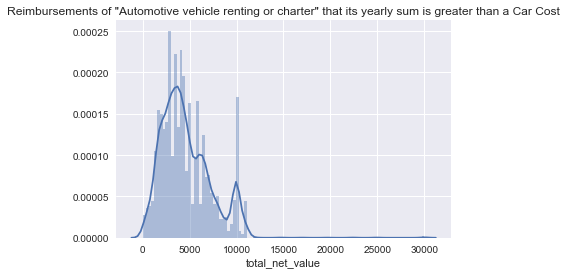

In [118]:
sns.distplot(rent_car_outlier['total_net_value'],bins=100)
plt.title('Reimbursements of "Automotive vehicle renting or charter" that its yearly sum is greater than a Car Cost')

In [119]:
rent_car_outlier['total_net_value'].sum()

55061917.29999999

In [120]:
rent_car_outlier['total_net_value'].describe()

count    11867.000000
mean      4639.918876
std       2661.100969
min         34.430000
25%       2750.000000
50%       4000.000000
75%       6100.000000
max      30000.000000
Name: total_net_value, dtype: float64

### We found 11,867 reimbursements (R$55 millions) that its yearly sum was greater than a Car Cost. 

# 'Automotive vehicle renting or watercraft charter' and 'Watercraft renting or charter'

We can see when the subquota 'Automotive vehicle renting or watercraft charter' was split almost all its expenses were about car rent. How the main purpose of rent a boat and rent a car is the same for a congressman, we will use the same limit for this two subquotas, the cost of one car R$37,890.

'Automotive vehicle renting or watercraft charter'

In [121]:
rent_car_and_boat_congressperson = rent_car_and_boat.groupby(['congressperson_id',
                                    'year',]).agg({'total_net_value':sum})
rent_car_and_boat_congressperson = rent_car_and_boat_congressperson.reset_index()
rent_car_and_boat_congressperson = rent_car_and_boat_congressperson[rent_car_and_boat_congressperson['total_net_value'] >= car_cost].reset_index()
rent_car_and_boat_congressperson['cong_year'] = rent_car_and_boat_congressperson['congressperson_id'].map(str)+rent_car_and_boat_congressperson['year'].map(str)
cong_year = rent_car_and_boat_congressperson['cong_year'].unique()

rent_car_and_boat['cong_year'] = rent_car_and_boat['congressperson_id'].map(str)+rent_car_and_boat['year'].map(str)
rent_car_and_boat_outlier = rent_car_and_boat[rent_car_and_boat['cong_year'].isin(cong_year)]

del rent_car_and_boat_outlier['cong_year']
rent_car_and_boat_outlier['suspect'] = "Rent car and boat monthly"

C:\Users\fabio\Anaconda3\envs\serenata_de_amor\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\fabio\Anaconda3\envs\serenata_de_amor\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


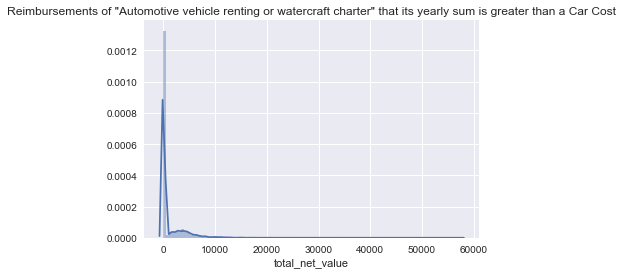

In [122]:
sns.distplot(rent_car_and_boat_outlier['total_net_value'],bins=100)
plt.title('Reimbursements of "Automotive vehicle renting or watercraft charter" that its yearly sum is greater than a Car Cost')

In [123]:
rent_car_and_boat_outlier['total_net_value'].sum()

76232184.610000014

In [124]:
rent_car_and_boat_outlier['total_net_value'].describe()

count    70091.000000
mean      1087.617306
std       2374.141959
min          0.100000
25%          6.400000
50%         14.000000
75%        274.060000
max      57333.000000
Name: total_net_value, dtype: float64

### We found 70,091 reimbursements (R$76,2 millions) that its yearly sum was greater than a Car Cost. 

'Watercraft renting or charter'

In [125]:
rent_boat_congressperson = rent_boat.groupby(['congressperson_id',
                                    'year',]).agg({'total_net_value':sum})
rentboat_congressperson = rent_boat_congressperson.reset_index()
rent_boat_congressperson = rent_boat_congressperson[rent_boat_congressperson['total_net_value'] >= car_cost].reset_index()
rent_boat_congressperson['cong_year'] = rent_boat_congressperson['congressperson_id'].map(str)+rent_boat_congressperson['year'].map(str)
cong_year = rent_boat_congressperson['cong_year'].unique()

rent_boat['cong_year'] = rent_boat['congressperson_id'].map(str)+rent_boat['year'].map(str)
rent_boat_outlier = rent_boat[rent_boat['cong_year'].isin(cong_year)]

del rent_boat_outlier['cong_year']
rent_boat_outlier['suspect'] = "Rent boat monthly"

C:\Users\fabio\Anaconda3\envs\serenata_de_amor\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\fabio\Anaconda3\envs\serenata_de_amor\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


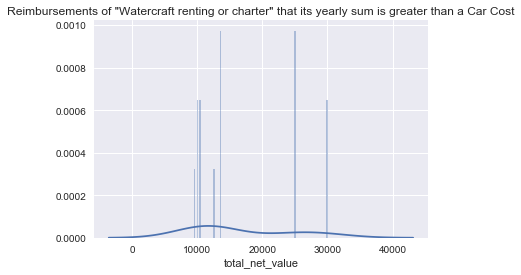

In [126]:
sns.distplot(rent_boat_outlier['total_net_value'],bins=100)
plt.title('Reimbursements of "Watercraft renting or charter" that its yearly sum is greater than a Car Cost')

In [127]:
rent_boat_outlier['total_net_value'].sum()

251400.0

In [128]:
rent_boat_outlier['total_net_value'].describe()

count       15.000000
mean     16760.000000
std       7778.455594
min       9500.000000
25%      10500.000000
50%      13500.000000
75%      25024.995000
max      30050.010000
Name: total_net_value, dtype: float64

### We found 15 reimbursements (R$251,400) that its yearly sum was greater than a Car Cost. 

# The Suspects

In this last part we will analize the suspects reimbursements

In [158]:
suspects_reimbursements = pd.DataFrame()
suspects_reimbursements = suspects_reimbursements.append(fuel_outliers_redflag)
suspects_reimbursements = suspects_reimbursements.append(fuel_outliers_yellowflag)
suspects_reimbursements = suspects_reimbursements.append(fuel_outlier_monthlycost)
suspects_reimbursements = suspects_reimbursements.append(rent_car_outlier)
suspects_reimbursements = suspects_reimbursements.append(rent_car_and_boat_outlier)
suspects_reimbursements = suspects_reimbursements.append(rent_boat_outlier)
suspects_reimbursements = suspects_reimbursements.sort('total_net_value', ascending=False)
suspects_reimbursements.head()

C:\Users\fabio\Anaconda3\envs\serenata_de_amor\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,year,applicant_id,document_id,reimbursement_value_total,total_net_value,reimbursement_numbers,congressperson_name,congressperson_id,congressperson_document,term,...,document_value,remark_value,net_values,month,installment,passenger,leg_of_the_trip,batch_number,reimbursement_values,suspect
189223,2010,1157,1823608,NaN,57333.0,3301,ROBERTO ROCHA,74209,83,2007.0,...,57333.0,0.0,57333.0,4,0,NaN,NaN,467627,NaN,Rent car and boat monthly
225556,2010,1559,1917495,NaN,35890.0,3420,CLÓVIS FECURY,74026,73,2007.0,...,35890.0,0.0,35890.0,8,0,NaN,NaN,492715,NaN,Rent car and boat monthly
546046,2011,2370,2235266,NaN,34650.0,3832,ALMEIDA LIMA,160626,173,2011.0,...,34650.0,0.0,34650.0,10,0,NaN,NaN,583859,NaN,Rent car and boat monthly
932726,2013,2370,5128758,NaN,34500.0,4306,ALMEIDA LIMA,160626,173,2011.0,...,34500.0,0.0,34500.0,5,0,NaN,NaN,1034145,NaN,Rent car and boat monthly
932739,2013,2370,5226664,NaN,34500.0,4412,ALMEIDA LIMA,160626,173,2011.0,...,34500.0,0.0,34500.0,9,0,NaN,NaN,1059724,NaN,Rent car and boat monthly


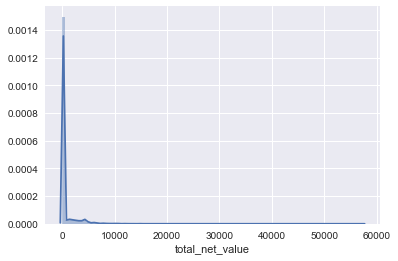

In [140]:
sns.distplot(suspects_reimbursements['total_net_value'],bins=100)

In [141]:
suspects_reimbursements['total_net_value'].sum()

232707288.5

In [142]:
suspects_reimbursements['total_net_value'].describe()

count    397020.000000
mean        586.134926
std        1518.751134
min           0.010000
25%          50.000000
50%         100.020000
75%         160.992500
max       57333.000000
Name: total_net_value, dtype: float64

Who are these congresspeople?

In [154]:
suspects_congresspeople = suspects_reimbursements.groupby(['congressperson_name']).agg({'total_net_value':sum}).sort('total_net_value',ascending=False)
suspects_congresspeople.head()

C:\Users\fabio\Anaconda3\envs\serenata_de_amor\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,total_net_value
congressperson_name,
ARNON BEZERRA,1511253.00
LÚCIO VALE,1383094.13
SILVIO COSTA,1295613.00
GIVALDO CARIMBÃO,1286586.59
CLAUDIO CAJADO,1153637.28


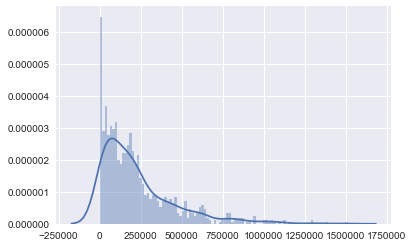

In [134]:
sns.distplot(suspects_congresspeople,bins=100)

In [160]:
suspects_congresspeople['total_net_value'].describe()

count    1.023000e+03
mean     2.274754e+05
std      2.290530e+05
min      1.000000e+03
25%      6.480357e+04
50%      1.647915e+05
75%      3.083609e+05
max      1.511253e+06
Name: total_net_value, dtype: float64

Who are these companies?

In [ ]:
Who are these companies

In [153]:
suspects_companies = suspects_reimbursements.groupby(['cnpj_cpf']).agg({'total_net_value':sum}).sort('total_net_value',ascending=False)
suspects_companies.head()

C:\Users\fabio\Anaconda3\envs\serenata_de_amor\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,total_net_value
cnpj_cpf,
11842749000100,2320944.20
07447405000111,1530029.16
02570474000102,1391394.00
11869422000114,1109839.61
02363284000106,1010847.66


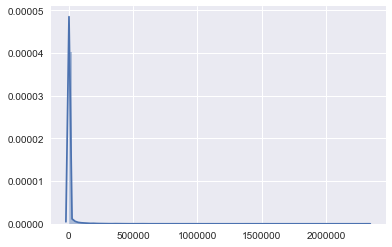

In [136]:
sns.distplot(suspects_companies,bins=100)

In [161]:
suspects_companies['total_net_value'].describe()

count    2.424000e+04
mean     9.599993e+03
std      5.080146e+04
min      2.000000e-02
25%      1.192600e+02
50%      3.000000e+02
75%      1.207610e+03
max      2.320944e+06
Name: total_net_value, dtype: float64

# Conclusion

### After to analyze six kinds of suspects reimbursement we found R$232 million to be investigated. There are 1,023 congresspeople and 24,240 companies in this list.